# Pattern Recognition 

## Contents:

### - Multinomial Naive Bayes (NB), Gaussian NB, Decision Trees

### - Sequential Neural Networks with Keras

In [ ]:
# installing necessary packages
!pip install keras
!pip install tensorflow
!pip install seaborn

Check for missing values
0    0
1    0
2    0
dtype: int64


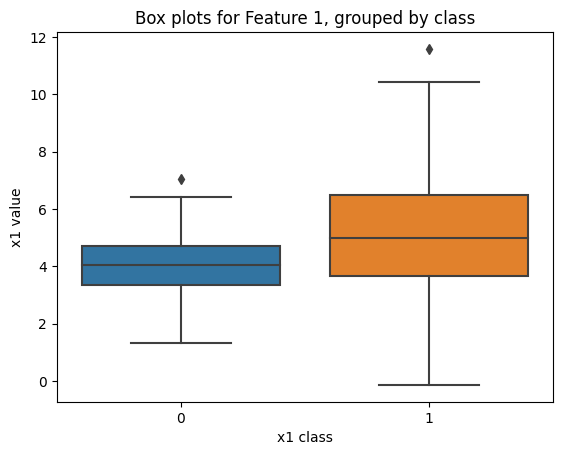

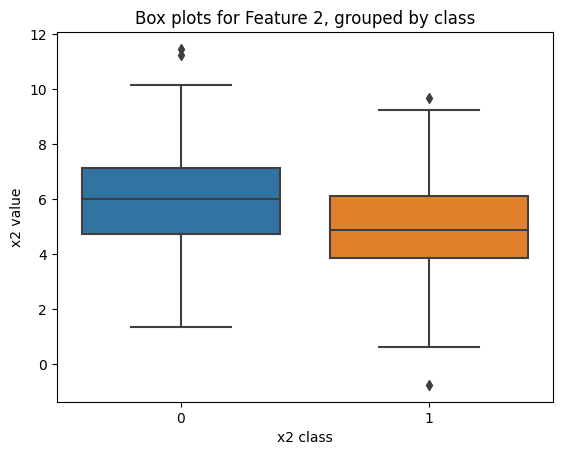

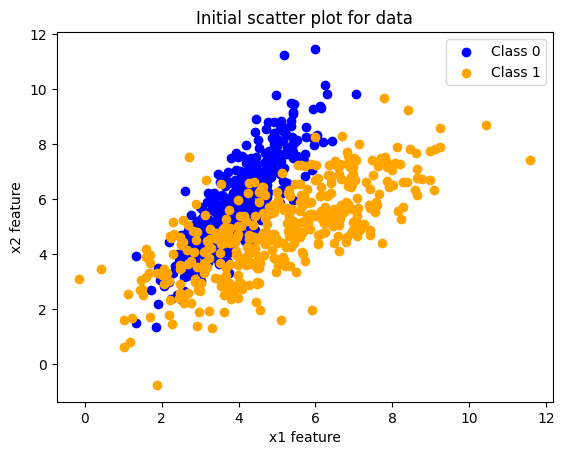

In [43]:
# Reading data from csv file and data preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Data_for_NN/Dataset.csv', header = None)
class0_data = df[df[2] == 0].to_numpy()
class1_data = df[df[2] == 1].to_numpy()

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Check for missing values
print("Check for missing values")
print(df.isnull().sum()) 

# Create box plots for feature1, grouped by class to check data distribution and outliers
plt.figure(1)
sns.boxplot(x=2, y=0, data=df)
plt.xlabel("x1 class")
plt.ylabel("x1 value")
plt.title("Box plots for Feature 1, grouped by class")

# Create box plots for feature2, grouped by class to check data distribution and outliers
plt.figure(2)
sns.boxplot(x=2, y=1, data=df)
plt.xlabel("x2 class")
plt.ylabel("x2 value")
plt.title("Box plots for Feature 2, grouped by class")

# Creating a scatter plot for data visualization
plt.figure(3)
plt.scatter(class0_data[:,0], class0_data[:,1], color='blue', label='Class 0')
plt.scatter(class1_data[:,0], class1_data[:,1], color='orange', label='Class 1')
plt.xlabel("x1 feature")
plt.ylabel("x2 feature")
plt.title("Initial scatter plot for data")
plt.legend()

plt.show()


In [55]:
# Split train-validation sets and perform Normalization

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=40)

# Normalize the data 
scaler = preprocessing.MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [56]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the probabilities for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int)

    # Reshape the predictions to match the grid shape
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary lines
    plt.contour(xx, yy, Z, levels=[0.5], colors='black')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

In [57]:
# Implementing different classsification models and calculating metrics
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Create a function that trains different classification models
def train_models(input_X_train, input_y_train, input_X_test, input_y_test):
    models = {
        'Multinomial NB': MultinomialNB(),
        'Gaussian NB': GaussianNB(),
        'Decision Trees': DecisionTreeClassifier()
    }
    
    accuracy, precision, recall, f1 = {}, {}, {}, {}
    
    for key in models.keys():
        print("\n --- Current model:", key, " ---\n")
      
        # Fit the classifier
        models[key].fit(input_X_train, input_y_train)
      
        # Make predictions
        predictions = models[key].predict(input_X_test)
      
        # Calculate metrics
        accuracy[key] = metrics.accuracy_score(predictions, input_y_test)
        precision[key] = metrics.precision_score(predictions, input_y_test)
        recall[key] = metrics.recall_score(predictions, input_y_test)
        f1[key] = metrics.f1_score(predictions, input_y_test)

        plot_decision_boundary(models[key], X, y)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
        plt.show()

    # Display metrics
    df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1'])
    df_model['Accuracy'] = accuracy.values()
    df_model['Precision'] = precision.values()
    df_model['Recall'] = recall.values()
    df_model['F1'] = f1.values()

    df_model = df_model.round(4) * 100

    display(df_model)
    ax = df_model.plot.bar(rot=60)
    ax.legend(
        ncol=len(models.keys()), 
        bbox_to_anchor=(0, 1), 
        loc='lower left', 
        prop={'size': 12}
    )
    plt.tight_layout()

    return df_model


 --- Current model: Multinomial NB  ---



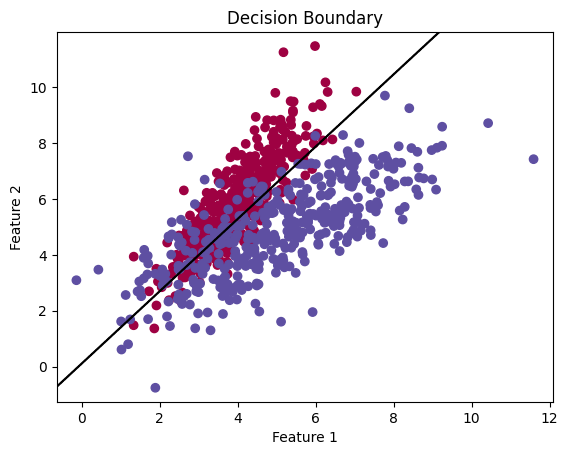


 --- Current model: Gaussian NB  ---



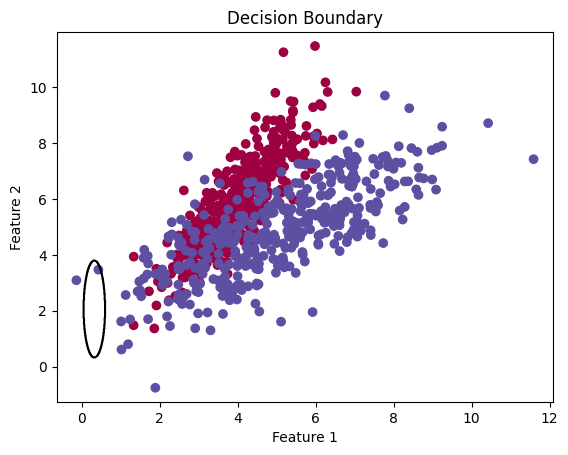


 --- Current model: Decision Trees  ---



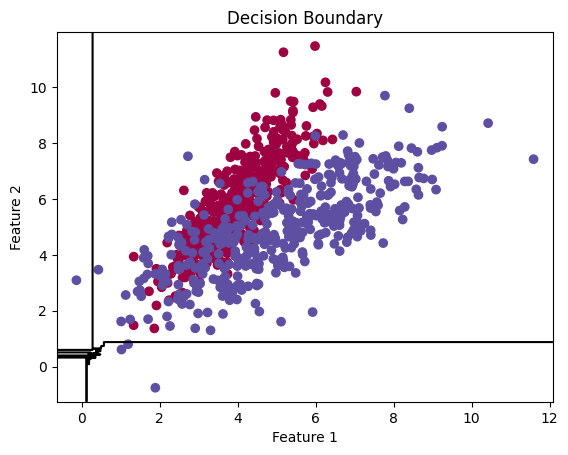

,Accuracy,Precision,Recall,F1
Multinomial NB,67.50,88.31,61.26,72.34
Gaussian NB,77.50,70.13,80.60,75.00
Decision Trees,75.62,76.62,73.75,75.16


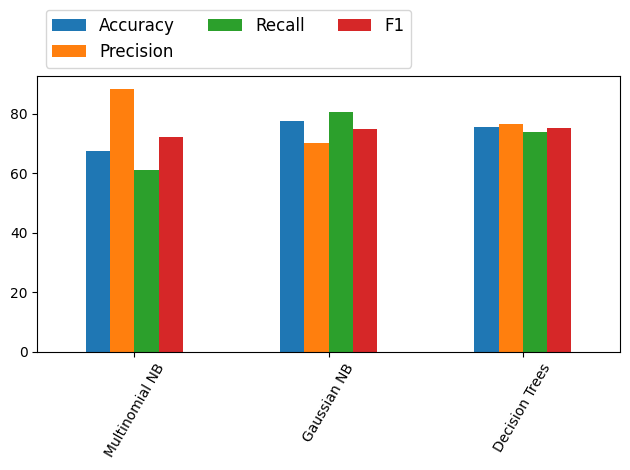

In [58]:
# Train models and display the results
CV_results = train_models(X_train_scaled, y_train, X_valid_scaled, y_valid)

## Neural Network with keras

Epoch 1/500
20/20 [==============================] - 1s 35ms/step - loss: 0.7698 - accuracy: 0.5266 - val_loss: 0.7087 - val_accuracy: 0.4812
Epoch 2/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6550 - accuracy: 0.6203 - val_loss: 0.5968 - val_accuracy: 0.7375
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6000 - accuracy: 0.6766 - val_loss: 0.5203 - val_accuracy: 0.7688
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 0.5302 - accuracy: 0.7312 - val_loss: 0.4582 - val_accuracy: 0.7875
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4700 - accuracy: 0.7844 - val_loss: 0.4392 - val_accuracy: 0.7812
Epoch 6/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4661 - accuracy: 0.7766 - val_loss: 0.4314 - val_accuracy: 0.7875
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4383 - accuracy: 0.7812 - val_loss: 0.4246 - val_accuracy: 0.7875
Epoch 8/500


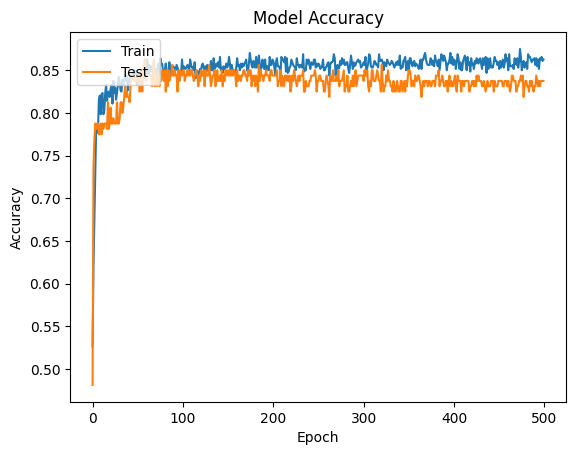

532/532 [==============================] - 1s 2ms/step


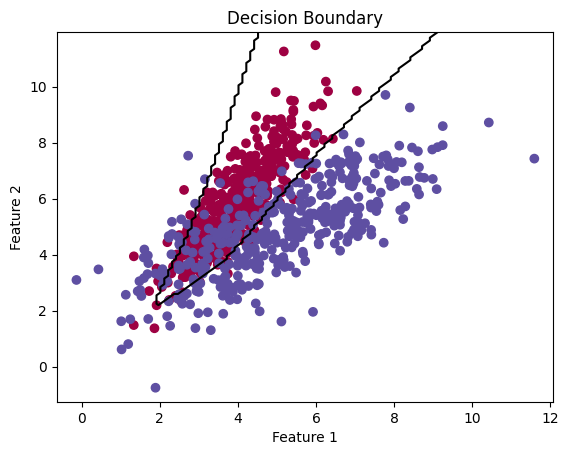

In [176]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Define the model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
adam = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model and collect history
history = model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1, validation_data=(X_valid, y_valid))

# Plot the accuracy on train and test sets
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the decision boundary
plot_decision_boundary(model, X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()

The architecture looks fine, so we can train the model to our whole training data and then get the predictions for the testing dataset.

Epoch 1/500
25/25 [==============================] - 1s 3ms/step - loss: 0.6914 - accuracy: 0.5337
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5663
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.5750
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5612
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy: 0.6500
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.6612
Epoch 7/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.6850
Epoch 8/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6760 - accuracy: 0.7000
Epoch 9/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6742 - accuracy: 0.7050
Epoch 10/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6662 - accuracy: 0.7250
Epoch 11/

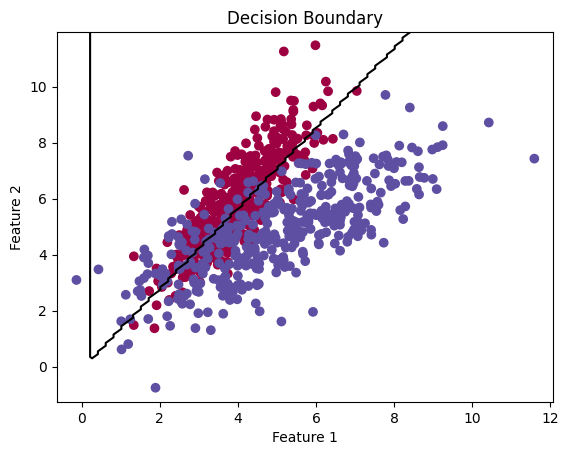

In [178]:
# Train a new model on the full dataset
X_scaled = scaler.fit_transform(X)

# Define the model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
adam = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model and collect history
history = model.fit(X_scaled, y, epochs=500, batch_size=32, verbose=1)


# Plot the decision boundary
plot_decision_boundary(model, X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()

In [179]:
# Load testing data from DatasetVal.csv
# And creating predictions using best_model (NN)

test_data_df = pd.read_csv('./Data_for_NN/DatasetVal.csv', header = None)
X_test = test_data_df.to_numpy()
X_test = scaler.transform(X_test)

# predict class probabilities for the X_test dataset
probabilities  = model.predict(X_test)

predictions = probabilities.round()

print(predictions)

7/7 [==============================] - 0s 2ms/step
[[1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 

In [180]:
# load testing labels from Labels.csv
# And calculating accuracy

test_labels_df = pd.read_csv('./Data_for_NN/Labels.csv', header = None)
y_real = test_labels_df.to_numpy()
n_correct = 0

for i in range(len(y_real)):
    if y_real[i] == predictions[i]:
        n_correct += 1

accuracy = n_correct / len(y_real)
print("\n --- Accuracy in testing data: ---\n")
print(accuracy)


 --- Accuracy in testing data: ---

0.85
